Intervalos de confianza para la media, y una proporción

Con los datos de ENSANUT 2018 Se tiene interés en estimar la media del IMC para hombres entre 25 y 65 años de edad de los estados de 1 AGUASCALIENTES,  6	COLIMA, 11	GUANAJUATO, 14	JALISCO, 16	MICHOACÁN, 18	NAYARIT

1. Obtenga los datos correspondientes, de ser necesario limpielos.
2. Haga un análisis descriptivo del IMC muestral y comente
3. Obtenga los cuantiles 0.025 y 0.975 de la muestra, e inteprete.
4. Obtenga un intervalo de confianza para la media poblacional, e interprete.
5. Para todo los hombres del occidente del país, entre 25 y 65 años, calcule el porcentaje que tiene obsesidad porque IMC es mayor que 30;
6. Estime un intervalo de confianza al 95% para este porcentaje anterior, e interpretelo.

Tamaño de muestra 233 
Estadísticos IMC hombres de occidente

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.64   24.73   27.58   27.92   30.67   44.19 

Deviación estándar

[1] 4.631392

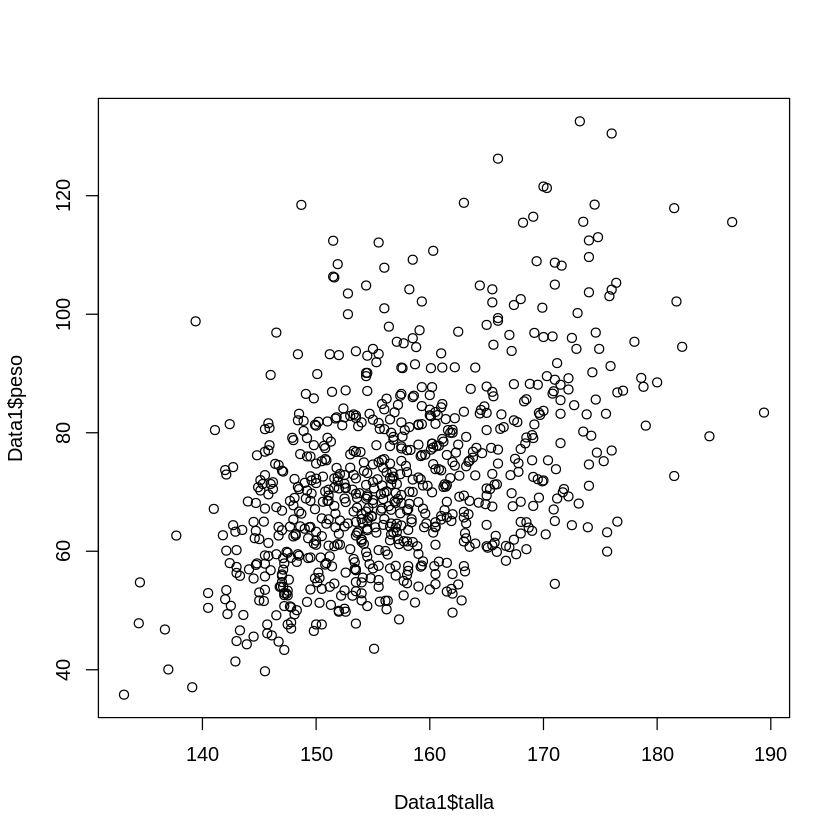

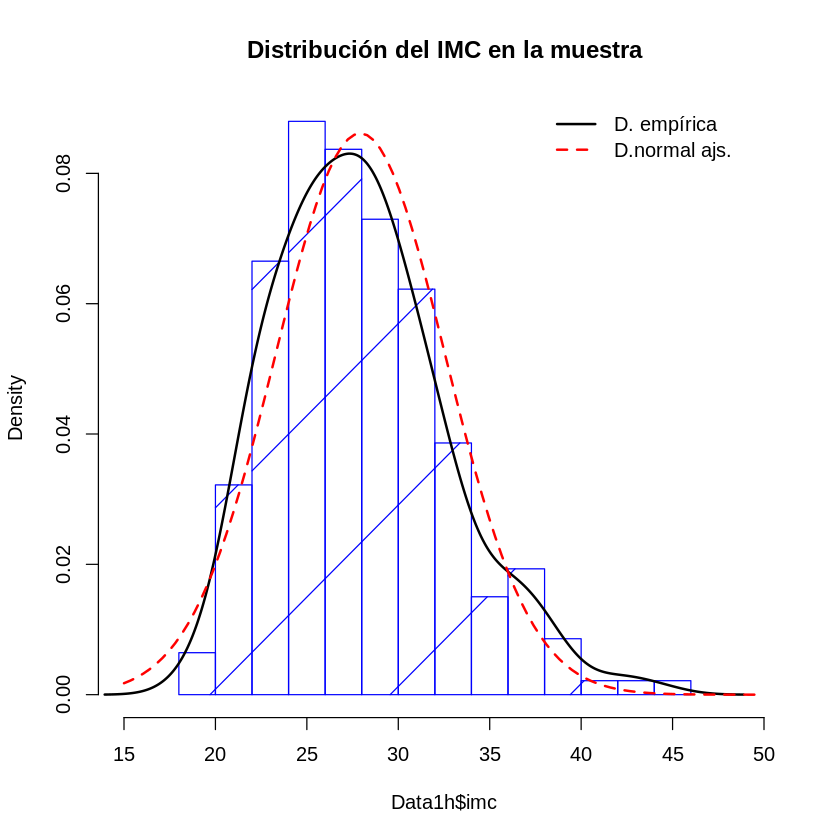

In [ ]:
library(readxl)
Data <- read_excel("EnsanutMediciones.xls")
#Delimitar el alcance del estudio
Data1<-subset (Data, entidad %in% c(1,6,11, 14, 16,18))
Data1<-subset (Data1, Data1$edad>=25 & Data1$edad<=65 & Data1$peso != 222.22 & Data1$talla <= 220 & Data1$sistol3 != 222.22 & Data1$diastol3 != 222.22 & Data1$cintura != 222.22 & Data1$talla > 120)
plot(Data1$talla,Data1$peso)
Data1$imc<-Data1$peso/(Data1$talla/100)^2
#summary(Data1$talla[Data1$sexo==1])
Data1h<-subset (Data1, Data1$sexo==1)
n<-length(Data1h$imc)
cat("Tamaño de muestra",n,"\n")

cat("Estadísticos IMC hombres de occidente")
summary(Data1h$imc)
cat("Deviación estándar")
sd(Data1h$imc)
hist(Data1h$imc,freq = FALSE, breaks = "Scott",density = TRUE, col="blue", main = "Distribución del IMC en la muestra",
xlim = c(15,50))
lines(density(Data1h$imc, bw = "SJ"), lty=1, lwd=2)
# Densidad normal ajustada
curve(dnorm(x,mean = mean(Data1h$imc, na.rm = TRUE), sd = sd(Data1h$imc, na.rm = TRUE)),
add = TRUE, col = "red", lty = 2, lwd = 2)
# Leyenda para ambas curvas
legend("topright",
       legend = c("D. empírica", "D.normal ajs."),
       col = c("black", "red"),
       lty = c(1, 2),
       lwd = 2,
       bty = "n")  # sin borde



Interpretación: djd


In [ ]:
#Intervalo de confianza para la media poblacional del IMC, e interprete.
alfa<-0.05
t.test(Data1h$imc, conf.level = 0.95)
erro.est<-qt(1-alfa/2, n-1)*sd(Data1h$imc)/(n)^0.5

cat("La media del IMC anda en", mean(Data1h$imc), "± un error de ",erro.est, "con una cofianza del 95%")






	One Sample t-test

data:  Data1h$imc
t = 92.033, df = 232, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 27.32623 28.52182
sample estimates:
mean of x 
 27.92402 


La media del IMC anda en 27.92402 ± 0.5977962 con una cofianza del 95%

In [ ]:
#proporcio de hombres con IMC>30 cm.
pm <- mean(Data1h$imc > 30)

cat("Un", 100*pm,"por ciento de los hombres en la muestra tienen un IMC>30","\n")

#Intervalo de confianza
li<-pm-qnorm(0.975,0,1)*(pm*(1-pm)/n)^0.5
ls<-pm+qnorm(0.975,0,1)*(pm*(1-pm)/n)^0.5

cat("La propoción de hombres con IMC>30 en la población anda entre", 100*li," y ", 100*ls, " por ciento","\n")

cat("La propoción de hombres con IMC>30 en la población es de", 100*pm, "± un error de ",100*qnorm(0.975,0,1)*(pm*(1-pm)/n)^0.5, " por ciento, con una cofianza del 95%")


Un 30.04292 por ciento de los hombres en la muestra tienen un IMC>30 
La propoción de hombres con IMC>30 en la población anda entre 24.15642  y  35.92942  por ciento 
La propoción de hombres con IMC>30 en la población es de 30.04292 ± un error de  5.886498  por ciento, con una cofianza del 95%

#Evaluación de distribución normal del IMC


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Data1h$imc
D = 0.053019, p-value = 0.5291
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  Data1h$imc
W = 0.97085, p-value = 0.0001007


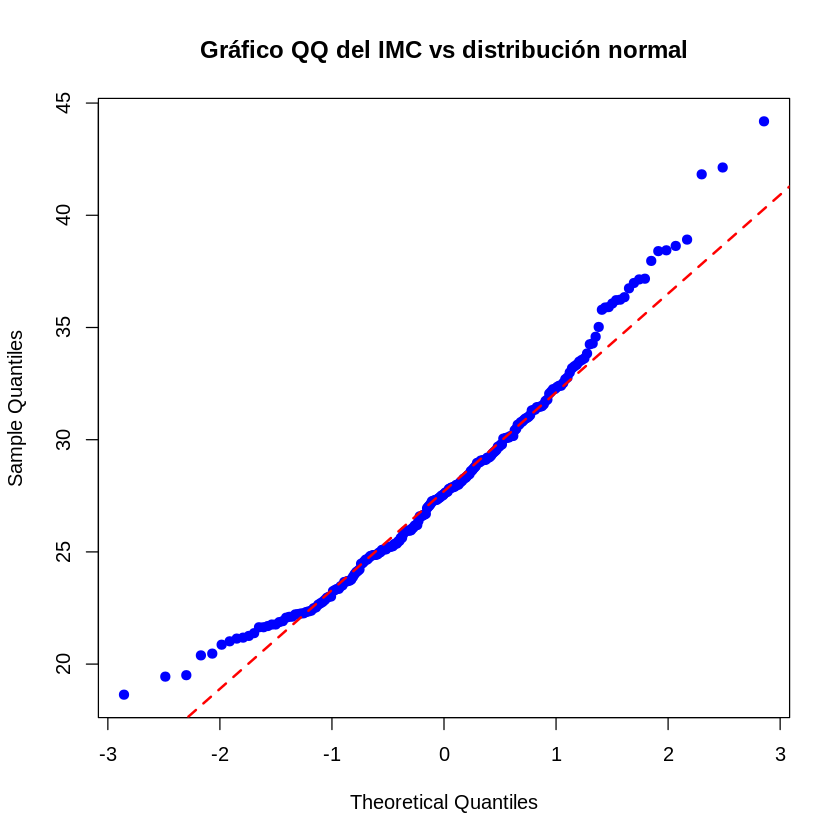

In [ ]:
# Gráfico QQ para IMC
qqnorm(Data1h$imc,
       main = "Gráfico QQ del IMC vs distribución normal",
       col = "blue",
       pch = 19)

# Línea de referencia
qqline(Data1h$imc,
       col = "red",
       lwd = 2,
       lty = 2)
ks.test(Data1h$imc,"pnorm",  mean(Data1h$imc), sd(Data1h$imc))

shapiro.test(Data1h$imc)